# Tasa de retorno de un activo

$P_t = \frac{P_f- P_i}{P_i}$

p = precio

$p_t = log (P_t)$

## Movimiento Browniano

$p_t = p_{t-1} + \mu + e_t$

$\mu$ drift (deriva o pasos)

$e_t$ ruido gaussiano

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
T = 1000
P0 = 10 #valor inicial
mu = 0.001 #drift

In [5]:
# p_{t-1}
last_p = np.log(P0)

# arreglo para almacenar
log_returns = np.zeros(T)
prices = np.zeros(T)

for t in range(T):
  # taza de retorno
  r = 0.01 * np.random.randn()
  # p_t
  p = last_p + mu + r
  # almacenar resultados
  log_returns[t] = r + mu
  prices[t] = np.exp(p)
  # siguente paso
  last_p = p

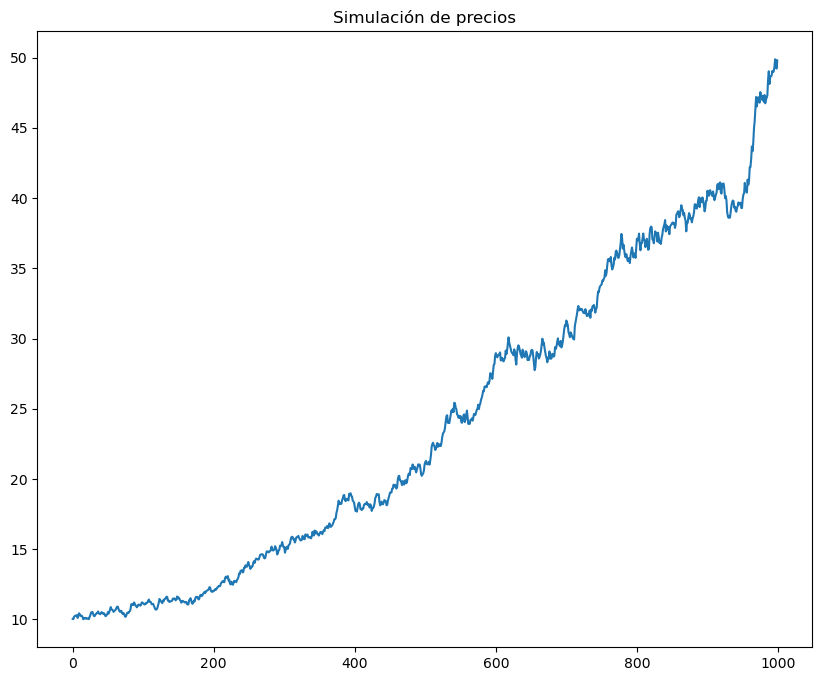

In [8]:
plt.figure(figsize=(10, 8))
plt.plot(prices)
plt.title("Simulación de precios");

# Métricas

https://finance.yahoo.com/quote/SPY/history

In [15]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

In [16]:
df = pd.read_csv('../datasets/SPY.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-21,403.059998,404.160004,398.820007,399.089996,393.115204,82655900
2023-02-22,399.519989,401.130005,397.019989,398.540009,392.573425,83742300
2023-02-23,401.559998,402.200012,396.250000,400.660004,394.661652,96242400
2023-02-24,395.420013,397.250000,393.640015,396.380005,390.445740,108194400
2023-02-27,399.869995,401.290009,396.750000,397.730011,391.775543,80444700


In [18]:
df['ClosePrediction'] = df['Close'].shift(1) #p_1
df.head()

,Open,High,Low,Close,Adj Close,Volume,ClosePrediction
Date,,,,,,,
2023-02-21,403.059998,404.160004,398.820007,399.089996,393.115204,82655900,NaN
2023-02-22,399.519989,401.130005,397.019989,398.540009,392.573425,83742300,399.089996
2023-02-23,401.559998,402.200012,396.250000,400.660004,394.661652,96242400,398.540009
2023-02-24,395.420013,397.250000,393.640015,396.380005,390.445740,108194400,400.660004
2023-02-27,399.869995,401.290009,396.750000,397.730011,391.775543,80444700,396.380005


In [19]:
y_true = df.iloc[1:]['Close']
y_pred = df.iloc[1:]['ClosePrediction']

In [28]:
# SSE (Sum of Squared Errors)
np.sum((y_true - y_pred)**2)


2846.1548852573087

In [29]:
# MSE (Mean Squared Error)
np.mean((y_true - y_pred)**2)/ len(y_true)

0.045904983552802515

In [30]:
# RMSE
mean_squared_error(y_true, y_pred, squared=False)

3.3808787178258592

In [31]:
# MAE
mean_absolute_error(y_true, y_pred)

2.659118289156629

In [33]:
# R^2
r2_score(y_true, y_pred)

0.9848916271940064

In [34]:
# MAPE
mean_absolute_percentage_error(y_true, y_pred)

0.006113826781194135

In [35]:
def smape(y_true, y_pred):
  numerator = np.abs(y_true - y_pred)
  denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
  ratio = numerator / denominator
  return ratio.mean()

smape(y_true, y_pred)

0.006118185926886818